# Caso Final.

By: Gibson Andagoya.

## Importe la base de datos a una base en Jupyter Notebook con pandas. 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv("wm.csv")

In [3]:
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


## Evalúe si la base contiene datos perdidos.

In [4]:
missing = df.isna().sum()
print(missing)

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64



## Obtenga los descriptivos resumen de la base de datos e identifique a las variables numéricas y categóricas. ¿Hay algo que le llame la atención? 

In [5]:
import statsmodels.stats.api as sms
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.compat import lzip

In [6]:
df=df[['Store', 'Date', 'Weekly_Sales', 'Holiday_Flag', "CPI", "Unemployment"]]
df

,Store,Date,Weekly_Sales,Holiday_Flag,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,211.096358,8.106
1,1,12-02-2010,1641957.44,1,211.242170,8.106
2,1,19-02-2010,1611968.17,0,211.289143,8.106
3,1,26-02-2010,1409727.59,0,211.319643,8.106
4,1,05-03-2010,1554806.68,0,211.350143,8.106
...,...,...,...,...,...,...
6430,45,28-09-2012,713173.95,0,192.013558,8.684
6431,45,05-10-2012,733455.07,0,192.170412,8.667
6432,45,12-10-2012,734464.36,0,192.327265,8.667
6433,45,19-10-2012,718125.53,0,192.330854,8.667


In [7]:
df.describe()

,Store,Weekly_Sales,Holiday_Flag,CPI,Unemployment
count,6435.000000,6.435000e+03,6435.000000,6435.000000,6435.000000
mean,23.000000,1.046965e+06,0.069930,171.578394,7.999151
std,12.988182,5.643666e+05,0.255049,39.356712,1.875885
min,1.000000,2.099862e+05,0.000000,126.064000,3.879000
25%,12.000000,5.533501e+05,0.000000,131.735000,6.891000
50%,23.000000,9.607460e+05,0.000000,182.616521,7.874000
75%,34.000000,1.420159e+06,0.000000,212.743293,8.622000
max,45.000000,3.818686e+06,1.000000,227.232807,14.313000


## Evalúe si alguna de las variables contiene datos atípicos (outliers) 

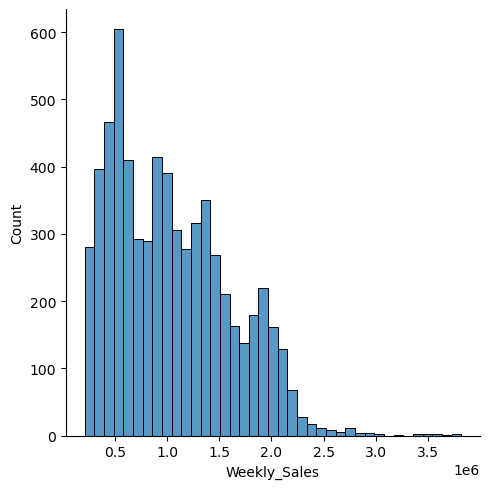

In [8]:
sns.displot(df["Weekly_Sales"])

Considero que la unica variable de la cual podria determinar si existen datos a tipicos o no, es en cuanto a las ventas semanales, ya que en primera isntancia se removio la variable temperatura y Fuel debido a que no considero importante en este analisis, las variabes restantes como el holiday flag no podria contener datos atipicos debido a que solo existen dos opciones, 0 y 1 esto podemos observarlo claramente en el grafico posterior.

## Grafique las distribuciones de las vsriables y a priori comente sobre ellas. 

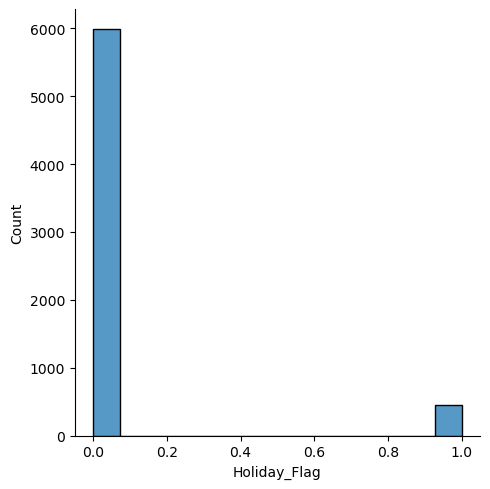

In [9]:
sns.displot(df["Holiday_Flag"])

En el grafico sobre los dias festivos podemos observar que solo existen dos opciones 0 y 1 por lo que no podriamos remover datos atipicos de esta variable.

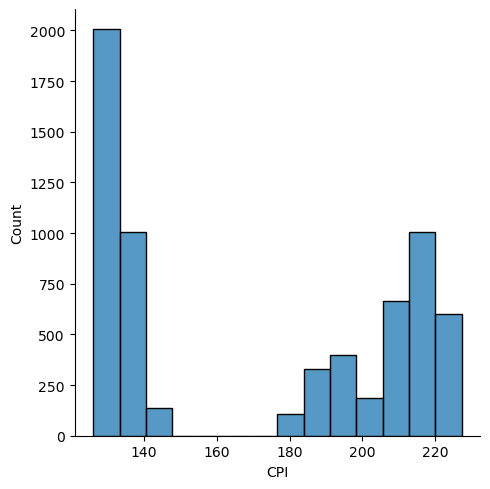

In [10]:
sns.displot(df["CPI"])

Tambien en el grafico de distribución del CPI podemos observar que no sigue una distribución normal y no tenemos datos en las colas los cuales puedan ser extraidos del analisis.

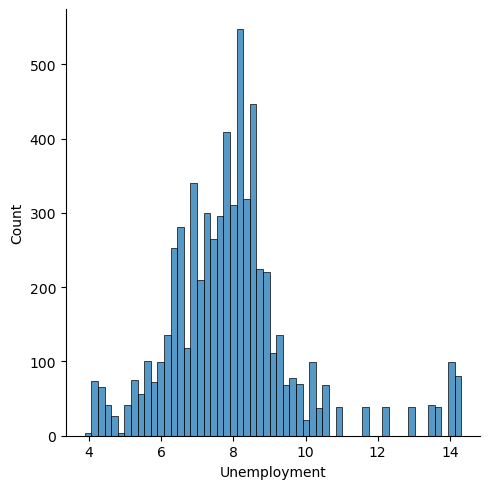

In [11]:
sns.displot(df["Unemployment"])

En los datos de desemeplo podemos observar que existen ciertos datos que parecen salir del rango o parametro dentro de los cuartiles establecidos a esta variable tambien aplicaremos el diagrama de bigotes y cajas para extraer los datos atipicos.

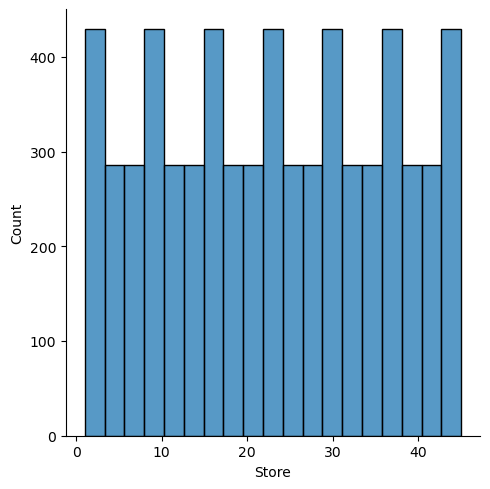

In [12]:
sns.displot(df["Store"])

En cuanto a la variable store podemos observar que no existe ningun tipo de distribución normal debido a que esta es una variable categorica y muestra tan solo el reconteo de los numeros de tiendas a esta variable tampoco se le aplicara ningun tipo de correctivo.

## De ser el caso, detalle cuáles y qué método estadístico aplicarán para corregir. 

Aplicaremos los cuartiles y el diagrama de caja y bigotes para remover los datos atipicos de la variable Unemployment y Sales.

## Weekly Sales

In [13]:
Q1WS=df["Weekly_Sales"].quantile(0.25)
Q3WS=df["Weekly_Sales"].quantile(0.75)
IQR_Weekly_Sales = Q3WS - Q1WS 
print(IQR_Weekly_Sales)
print(Q1WS)
print(Q3WS)

866808.5549999999
553350.105
1420158.66


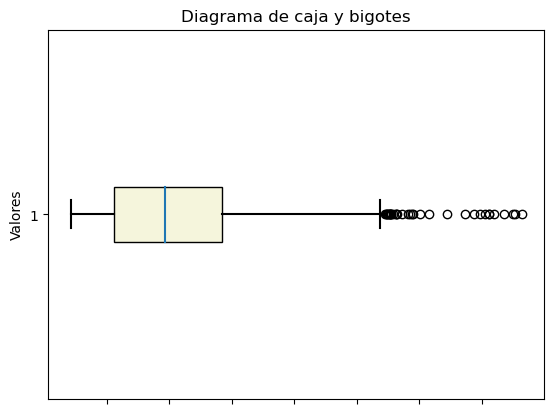

In [14]:
fig, ax = plt.subplots()
ax.boxplot([df['Weekly_Sales']], vert=False, patch_artist=True, boxprops=dict(facecolor='beige', color='k'), medianprops=dict(color='C0', linewidth=1.5), whiskerprops=dict(color='k', linewidth=1.5), capprops=dict(color='k', linewidth=1.5))

ax.set_title('Diagrama de caja y bigotes')
ax.set_ylabel('Valores')
ax.set_xticklabels(['Weekly_Sales'])
plt.xticks(rotation=45)


plt.show()

In [15]:
df["Weekly_Sales"].count

<bound method Series.count of 0       1643690.90
1       1641957.44
2       1611968.17
3       1409727.59
4       1554806.68
           ...    
6430     713173.95
6431     733455.07
6432     734464.36
6433     718125.53
6434     760281.43
Name: Weekly_Sales, Length: 6435, dtype: float64>

In [16]:
df_original = df.copy()

In [17]:
df= df[~((df["Weekly_Sales"]<(Q1WS-1.5*IQR_Weekly_Sales))|(df["Weekly_Sales"]>(Q3WS+1.5*IQR_Weekly_Sales)))]

In [18]:
df["Weekly_Sales"].count

<bound method Series.count of 0       1643690.90
1       1641957.44
2       1611968.17
3       1409727.59
4       1554806.68
           ...    
6430     713173.95
6431     733455.07
6432     734464.36
6433     718125.53
6434     760281.43
Name: Weekly_Sales, Length: 6401, dtype: float64>

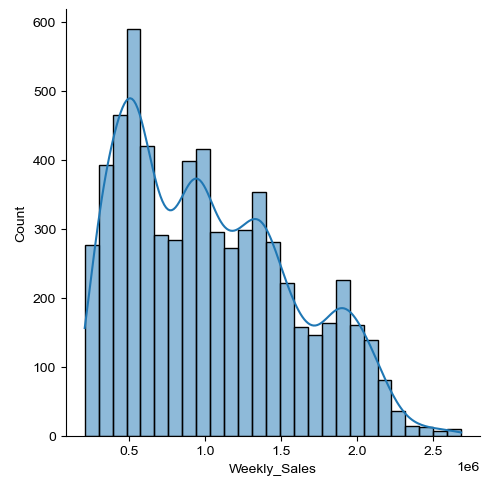

In [19]:
sns.displot(df["Weekly_Sales"], kde=True)
sns.set_style("whitegrid")

## Unemployment

In [20]:
Q1U=df["Unemployment"].quantile(0.25)
Q3U=df["Unemployment"].quantile(0.75)
IQR_Unemployment = Q3U - Q1U 
print(IQR_Unemployment)
print(Q1U)
print(Q3U)

1.7309999999999999
6.891
8.622


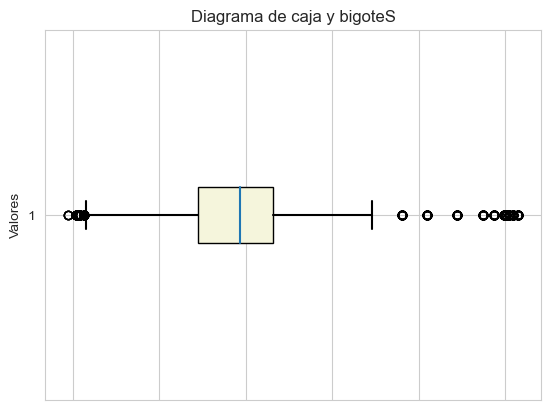

In [21]:
fig, ax = plt.subplots()
ax.boxplot([df['Unemployment']], vert=False, patch_artist=True, boxprops=dict(facecolor='beige', color='k'), medianprops=dict(color='C0', linewidth=1.5), whiskerprops=dict(color='k', linewidth=1.5), capprops=dict(color='k', linewidth=1.5))

ax.set_title('Diagrama de caja y bigoteS')
ax.set_ylabel('Valores')
ax.set_xticklabels(['Unemployment'])
plt.xticks(rotation=45)


plt.show()

In [22]:
df["Unemployment"].count

<bound method Series.count of 0       8.106
1       8.106
2       8.106
3       8.106
4       8.106
        ...  
6430    8.684
6431    8.667
6432    8.667
6433    8.667
6434    8.667
Name: Unemployment, Length: 6401, dtype: float64>

In [23]:
df_original = df.copy()

In [24]:
df= df[~((df["Unemployment"]<(Q1U-1.5*IQR_Unemployment))|(df["Unemployment"]>(Q3U+1.5*IQR_Unemployment)))]

In [25]:
df["Unemployment"].count

<bound method Series.count of 0       8.106
1       8.106
2       8.106
3       8.106
4       8.106
        ...  
6430    8.684
6431    8.667
6432    8.667
6433    8.667
6434    8.667
Name: Unemployment, Length: 5920, dtype: float64>

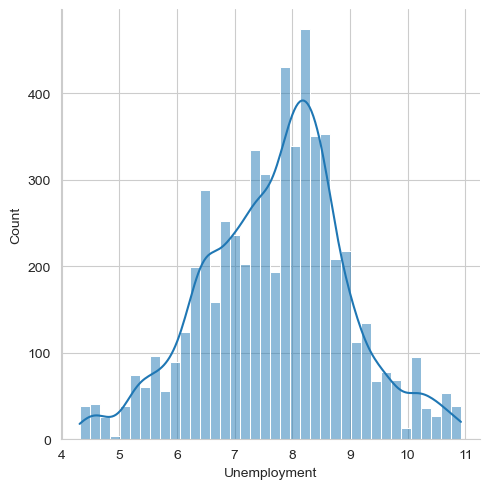

In [26]:
sns.displot(df["Unemployment"], kde=True)
sns.set_style("whitegrid")

## Obtenga las correlaciones entre los datos de corte numérico. 

In [27]:
df.corr().style.background_gradient(cmap='coolwarm')

,Store,Weekly_Sales,Holiday_Flag,CPI,Unemployment
Store,1.000000,-0.319128,0.004353,-0.208596,0.309445
Weekly_Sales,-0.319128,1.000000,0.024442,-0.082957,-0.073227
Holiday_Flag,0.004353,0.024442,1.000000,-0.000364,0.011014
CPI,-0.208596,-0.082957,-0.000364,1.000000,-0.218764
Unemployment,0.309445,-0.073227,0.011014,-0.218764,1.000000


en la matriz de correlación, puedemos observar una correlación negativa fuerte de -0.319 entre 'Store' y 'Weekly_Sales', lo que indica que hay una relación inversa entre el número de tienda y las ventas semanales. Cabe recalcar que correlación no implica causalidad.
Si el valor de correlación está cerca de 0, indica una correlación débil o nula entre las dos variables en nuestra matriz de correlación, puedemos observar valores cercanos a 0 entre 'Holiday_Flag' y otras variables.

## Comente que variable escogerán como variable dependiente y que variables introducirán a su modelo.

En este caso la variable dependiente sera las ventas semanales ya que estas dependeran del tipo de tienda y su comportamiento a traves del tiempo, nuestras variables explicativas serian las tiendas, las fechas si es un dia festivo entre otros.

## Indique que tipo de modelación realizarán y porqué. 

In [28]:
df=df.set_index(['Date', 'Store'])

In [29]:
Date = df.index.get_level_values('Date').to_list()
df['Date'] = pd.Categorical(Date)

In [44]:
pip install linearmodels


Note: you may need to restart the kernel to use updated packages.


In [30]:
from linearmodels import PooledOLS
import statsmodels.api as sm

## Pooled OLS

tomaremos esta como base y posteriormente realizaremos el test de Hausman para determinar cual de los dos modelos subsecuentes es el mejor.

In [31]:
X = sm.tools.tools.add_constant(df.Weekly_Sales)
y = df.Unemployment

In [32]:
modelo1 = PooledOLS(y, X)
resultados_pooled_OLS = modelo1.fit(cov_type='clustered', cluster_entity=True)

In [33]:
predicciones_pooled_OLS = resultados_pooled_OLS.predict().fitted_values
residuos_pooled_OLS = resultados_pooled_OLS.resids

In [34]:
resultados_pooled_OLS

Dep. Variable:,Unemployment,R-squared:,0.0054
Estimator:,PooledOLS,R-squared (Between):,-0.0054
No. Observations:,5920,R-squared (Within):,0.0061
Date:,"Mon, May 22 2023",R-squared (Overall):,0.0054
Time:,23:23:48,Log-likelihood,-9672.2
Cov. Estimator:,Clustered,,
,,F-statistic:,31.905
Entities:,143,P-value,0.0000
Avg Obs:,41.399,Distribution:,"F(1,5918)"
Min Obs:,33.000,,
Max Obs:,42.000,F-statistic (robust):,143.12


Un R-cuadrado negativo sugiere que el modelo no proporciona una buena representación de los datos y no tiene poder predictivo. Esto implica que las variables independientes incluidas en el modelo no están relacionadas o no son adecuadas para explicar la variabilidad en la variable dependiente.

Una prueba F con un valor de 31.90 indica que la combinación de las variables independientes en el modelo es estadísticamente significativa en su capacidad para explicar la variabilidad en la variable dependiente. En otras palabras, hay evidencia para afirmar que al menos una de las variables independientes tiene un efecto significativo en la variable dependiente.

## Verificación de los supuestos de la Regresión Pooled OLS

## Homocedasticidad

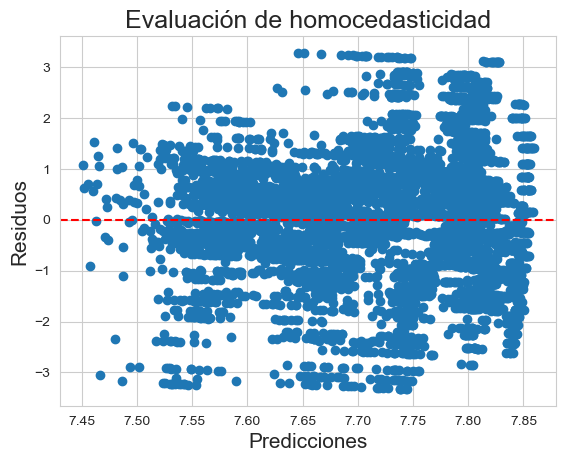

In [35]:
fig, ax = plt.subplots()
ax.scatter(predicciones_pooled_OLS, residuos_pooled_OLS)
ax.axhline(0, color = 'r', ls = '--')
ax.set_xlabel('Predicciones', fontsize = 15)
ax.set_ylabel('Residuos', fontsize = 15)
ax.set_title('Evaluación de homocedasticidad', fontsize = 18)
plt.show()

In [38]:
from statsmodels.stats.diagnostic import het_breuschpagan

In [39]:
pooled_OLS_df = pd.concat([df, residuos_pooled_OLS], axis=1)
pooled_OLS_df = pooled_OLS_df.drop(['Date'], axis = 1).fillna(0)
X_ = sm.tools.tools.add_constant(df['Weekly_Sales']).fillna(0)

In [40]:
pooled_OLS_df

,,Weekly_Sales,Holiday_Flag,CPI,Unemployment,residual
Date,Store,,,,,
05-02-2010,1,1643690.90,0,211.096358,8.106,0.483340
12-02-2010,1,1641957.44,1,211.242170,8.106,0.483054
19-02-2010,1,1611968.17,0,211.289143,8.106,0.478107
26-02-2010,1,1409727.59,0,211.319643,8.106,0.444745
05-03-2010,1,1554806.68,0,211.350143,8.106,0.468678
...,...,...,...,...,...,...
28-09-2012,45,713173.95,0,192.013558,8.684,0.907842
05-10-2012,45,733455.07,0,192.170412,8.667,0.894188
12-10-2012,45,734464.36,0,192.327265,8.667,0.894354


In [41]:
breusch_pagan = het_breuschpagan(pooled_OLS_df.residual, X_)
labels = ['LM-Stat', 'LM p-val', 'F-Stat', 'F p-val'] 
print(dict(zip(labels, breusch_pagan)))

{'LM-Stat': 54.28100692147403, 'LM p-val': 1.737733446637854e-13, 'F-Stat': 54.764812180798025, 'F p-val': 1.547873403698911e-13}


El p-value es una medida de la significancia estadística de la prueba. En este caso, el p-valor obtenido es 1.737733446637854e-13, que es muy pequeño esto indica que hay evidencia suficiente para rechazar la hipótesis nula de no heteroscedasticidad en favor de la hipótesis alternativa de heteroscedasticidad.


Los resultados indican que existe evidencia estadística significativa para afirmar que hay heteroscedasticidad en los errores del modelo.

## No- autocorrelación

In [42]:
from statsmodels.stats.stattools import durbin_watson

In [43]:
durbin_watson = durbin_watson(pooled_OLS_df.residual) 
print(durbin_watson)

0.0309485714462835


El valor obtenido de 0.0309485714462835 indica una fuerte evidencia de autocorrelación positiva en los residuos del modelo. 

## Modelo de Efectos Fijos "fixed effects"

In [44]:
from linearmodels import PanelOLS

In [45]:
modelo_fe = PanelOLS(y, X, entity_effects = True)
resultados_fe = modelo_fe.fit()

In [46]:
resultados_fe

Dep. Variable:,Unemployment,R-squared:,0.0061
Estimator:,PanelOLS,R-squared (Between):,-0.0057
No. Observations:,5920,R-squared (Within):,0.0061
Date:,"Mon, May 22 2023",R-squared (Overall):,0.0054
Time:,23:24:22,Log-likelihood,-9464.2
Cov. Estimator:,Unadjusted,,
,,F-statistic:,35.398
Entities:,143,P-value,0.0000
Avg Obs:,41.399,Distribution:,"F(1,5776)"
Min Obs:,33.000,,
Max Obs:,42.000,F-statistic (robust):,35.398


## Modelo de Efectos Aleatorios "random effects"

In [47]:
from linearmodels import RandomEffects

In [48]:
modelo_re = RandomEffects(y, X)
resultados_re = modelo_re.fit()

In [49]:
resultados_re

Dep. Variable:,Unemployment,R-squared:,0.0040
Estimator:,RandomEffects,R-squared (Between):,-0.0056
No. Observations:,5920,R-squared (Within):,0.0061
Date:,"Mon, May 22 2023",R-squared (Overall):,0.0054
Time:,23:24:27,Log-likelihood,-9535.9
Cov. Estimator:,Unadjusted,,
,,F-statistic:,23.796
Entities:,143,P-value,0.0000
Avg Obs:,41.399,Distribution:,"F(1,5918)"
Min Obs:,33.000,,
Max Obs:,42.000,F-statistic (robust):,34.651


## Test de Haussman

In [50]:
import numpy.linalg as la
from scipy import stats
import numpy as np

In [51]:
def hausman(fe, re):
    b = fe.params
    B = re.params
    v_b = fe.cov
    v_B = re.cov
    df = b[np.abs(b) < 1e8].size
    chi2 = np.dot((b - B).T, la.inv(v_b - v_B).dot(b - B)) 
 
    pval = stats.chi2.sf(chi2, df)
    return chi2, df, pval

In [52]:
hausman = hausman(resultados_fe, resultados_re) 

In [53]:
print('chi-Squared: ' + str(hausman[0]))
print('degrees of freedom: ' + str(hausman[1]))
print('p-Value:' + str(hausman[2]))

chi-Squared: 0.9604453519464748
degrees of freedom: 2
p-Value:0.6186456189520686


Dado que el valor p es mayor a 0,05 no se rechaza la hipótesis nula y se concluye que no hay suficiente evidencia para sugerir que los efectos fijos son endógenos.
No hay suficiente evidencia para rechazar la hipótesis nula de que los efectos fijos son exógenos. Esto implica que el modelo de efectos fijos puede es el apropiado.

## Enfoque en el machine learning

Para mi trabao me enfocare en el machine learning por lo que utilizare a la tienda numero 1 para esto utilizare como variable dependiente a las ventas y como variables independientes al CPI y el desempleo asi como los dias festivos, el objetivo sera describir como estas variables afectan directamente el monto de ventas de la tienda uno.

In [63]:
df2=pd.read_csv("wm.csv")

In [64]:
df

,,Weekly_Sales,Holiday_Flag,CPI,Unemployment,Date
Date,Store,,,,,
05-02-2010,1,1643690.90,0,211.096358,8.106,05-02-2010
12-02-2010,1,1641957.44,1,211.242170,8.106,12-02-2010
19-02-2010,1,1611968.17,0,211.289143,8.106,19-02-2010
26-02-2010,1,1409727.59,0,211.319643,8.106,26-02-2010
05-03-2010,1,1554806.68,0,211.350143,8.106,05-03-2010
...,...,...,...,...,...,...
28-09-2012,45,713173.95,0,192.013558,8.684,28-09-2012
05-10-2012,45,733455.07,0,192.170412,8.667,05-10-2012
12-10-2012,45,734464.36,0,192.327265,8.667,12-10-2012


In [69]:


Store_name= '1'

df2 = df2[df2['Store'] == 1]

In [70]:
df2

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106
...,...,...,...,...,...,...,...,...
138,1,28-09-2012,1437059.26,0,76.08,3.666,222.981658,6.908
139,1,05-10-2012,1670785.97,0,68.55,3.617,223.181477,6.573
140,1,12-10-2012,1573072.81,0,62.99,3.601,223.381296,6.573
141,1,19-10-2012,1508068.77,0,67.97,3.594,223.425723,6.573


In [72]:
df2=df2[['Weekly_Sales', 'Holiday_Flag', "CPI", "Unemployment"]]

In [73]:
df2

,Weekly_Sales,Holiday_Flag,CPI,Unemployment
0,1643690.90,0,211.096358,8.106
1,1641957.44,1,211.242170,8.106
2,1611968.17,0,211.289143,8.106
3,1409727.59,0,211.319643,8.106
4,1554806.68,0,211.350143,8.106
...,...,...,...,...
138,1437059.26,0,222.981658,6.908
139,1670785.97,0,223.181477,6.573
140,1573072.81,0,223.381296,6.573
141,1508068.77,0,223.425723,6.573


In [74]:
from sklearn.linear_model import LinearRegression

In [78]:
from sklearn.preprocessing import LabelEncoder

In [86]:
X = df2[df2.columns.difference(['Weekly_Sales'])]
y = df2.Weekly_Sales

In [87]:
from sklearn.model_selection import train_test_split

In [88]:
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size = 0.30,random_state =152)

In [89]:
X_train

,CPI,Holiday_Flag,Unemployment
98,219.357722,0,7.866
93,218.220509,0,7.866
95,218.714733,0,7.866
133,222.171946,0,6.908
34,211.671989,0,7.838
...,...,...,...
128,221.932727,0,6.908
60,214.837166,0,7.682
70,215.043523,0,7.682
59,214.599939,0,7.742


In [90]:
print(X_train.shape,"",type(X_train))
print(y_train.shape,"\t ",type(y_train))
print(X_test.shape,"",type(X_test))
print(y_test.shape,"\t ",type(y_test))

(100, 3)  <class 'pandas.core.frame.DataFrame'>
(100,) 	  <class 'pandas.core.series.Series'>
(43, 3)  <class 'pandas.core.frame.DataFrame'>
(43,) 	  <class 'pandas.core.series.Series'>


In [91]:
modelo_regresion = LinearRegression()
modelo_regresion.fit(X_train, y_train)

LinearRegression()

In [92]:
predicciones_train = modelo_regresion.predict(X_train)
predicciones_test = modelo_regresion.predict(X_test)

In [93]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [94]:
MSE_train = mean_squared_error(y_train, predicciones_train)
MSE_test = mean_squared_error(y_test, predicciones_test)
print(MSE_train)

16797065988.3273


In [95]:
print(MSE_test)

33073211667.670597


In [96]:
import numpy as np

In [97]:
RMSE_train = np.sqrt(MSE_train)
RMSE_test = np.sqrt(MSE_test)
print(RMSE_train)


129603.49527820344


In [98]:
print(RMSE_test)

181860.41808945287


In [99]:
MAE_train = mean_absolute_error(y_train, predicciones_train)
MAE_test = mean_absolute_error(y_test, predicciones_test)
print(MAE_train)

94057.36359405826


In [100]:
print(MAE_test)

112633.91907726675


In [101]:
from sklearn.metrics import r2_score

In [102]:
r_square_train = r2_score(y_train, predicciones_train)
r_square_test  = r2_score(y_test, predicciones_test)
print('El R^2 de entrenamiento es:' , r_square_train)
print('El R^2 de prueba es:' , r_square_test)

El R^2 de entrenamiento es: 0.17916643437840374
El R^2 de prueba es: -0.01593627039436485


In [103]:
print('intercepto:', modelo_regresion.intercept_)
print('pendiente:', modelo_regresion.coef_) 

intercepto: -3413533.3301765984
pendiente: [ 18487.73127794 134565.76176581 127173.39994865]


## Entrenamiento

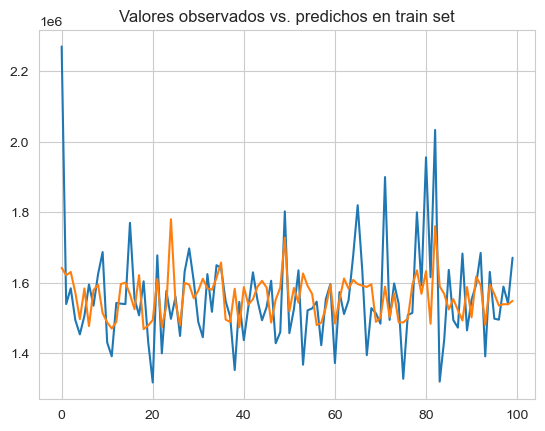

In [104]:
fig, ax = plt.subplots()
ax.plot(y_train.values)
ax.plot(predicciones_train)
plt.title("Valores observados vs. predichos en train set");

## Prueba

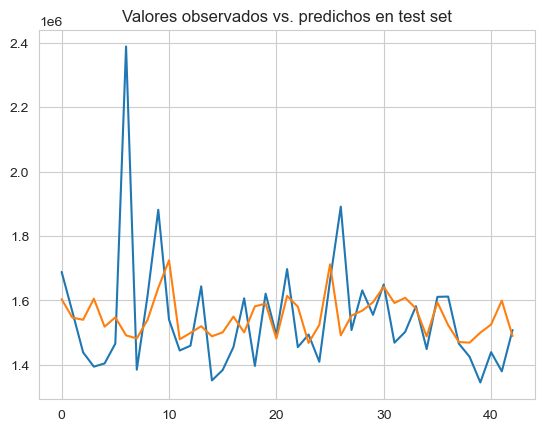

In [107]:
fig, ax = plt.subplots()
ax.plot(y_test.values)
ax.plot(predicciones_test)
plt.title("Valores observados vs. predichos en test set");

## Variables con mayor poder explicativo.

In [109]:
from sklearn.preprocessing import StandardScaler

In [110]:
sc = StandardScaler()

In [111]:
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

In [112]:
modelo_regresion_std = LinearRegression()
modelo_regresion_std.fit(X_train_std, y_train)

LinearRegression()

In [113]:
predicciones_train_std = modelo_regresion_std.predict(X_train_std)
predicciones_test_std = modelo_regresion_std.predict(X_test_std)

In [114]:
r_square_train_std = r2_score(y_train, predicciones_train_std)
r_square_test_std  = r2_score(y_test, predicciones_test_std)
print('El R^2 de entrenamiento es:' , r_square_train_std)
print('El R^2 de prueba es:' , r_square_test_std)

El R^2 de entrenamiento es: 0.17916643437840396
El R^2 de prueba es: -0.015936270394364405


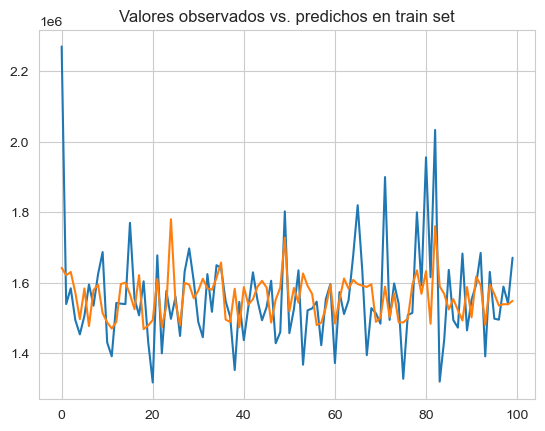

In [115]:
fig, ax = plt.subplots()
ax.plot(y_train.values)
ax.plot(predicciones_train_std)
plt.title("Valores observados vs. predichos en train set");

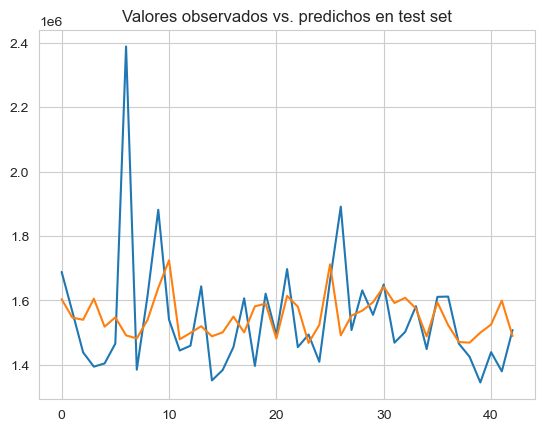

In [116]:
fig, ax = plt.subplots()
ax.plot(y_test.values)
ax.plot(predicciones_test_std)
plt.title("Valores observados vs. predichos en test set");

In [117]:
importancia = modelo_regresion_std.coef_

In [118]:
for i,v in enumerate(importancia):
    print('Variable explicativa No. %0d, Score: %.5f' % (i,v))

Variable explicativa No. 0, Score: 80216.47609
Variable explicativa No. 1, Score: 34334.05263
Variable explicativa No. 2, Score: 48700.95513


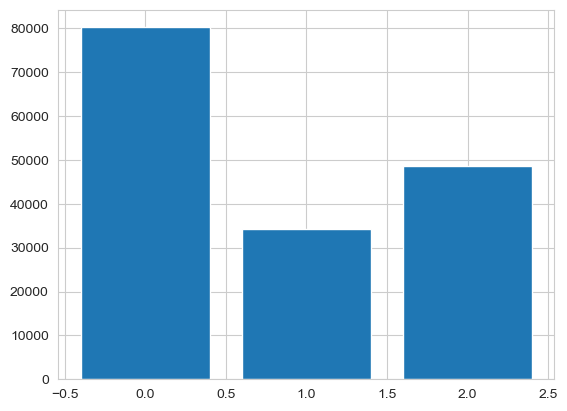

In [119]:
plt.bar([x for x in range(len(importancia))], importancia)
plt.show()

Todas las 3 variables tienen un gran poder explicativo sobre el desempeño en ventas semanales, sin embargo los valores son extremadamente altos.